title: "World-happiness-report"
author: "Rafaat Choki"
date: "2024-07-02"

## Einleitung

In dieser Analyse untersuchen wir die Entwicklung von Smartphones über die Jahre hinweg und die Zusammenhänge zwischen verschiedenen technischen Merkmalen. Unser Ziel ist es, zu verstehen, wie sich die Spezifikationen von Smartphones verändert haben, um den steigenden Anforderungen der Nutzer gerecht zu werden. Dazu werden wir die Daten bereinigen, explorativ analysieren, Hypothesen testen und statistische Modelle verwenden, um die wichtigsten Trends und Korrelationen in den Smartphone-Daten zu identifizieren.

### Hypothesen


**1. Hypothese:** **Größere Akkukapazität ist mit größeren Displays verbunden.**

   - **Erklärung:** Diese Hypothese nimmt an, dass Smartphones mit größeren Displays auch größere Akkus benötigen, um den zusätzlichen Energieverbrauch auszugleichen. Größere Bildschirme bieten eine bessere Benutzererfahrung, erfordern jedoch mehr Energie, was eine größere Batterie erforderlich macht, um eine angemessene Akkulaufzeit zu gewährleisten.

**2. Hypothese:** **Smartphones mit höherer Display-Auflösung bieten auch eine höhere Bildwiederholrate (Display_Refresh_Rate).**

   - **Erklärung:** Diese Hypothese nimmt an, dass Smartphones mit einer höheren Display-Auflösung (höherer Pixelwert) auch eine höhere Bildwiederholrate aufweisen. Geräte mit einer besseren Display-Technologie erfordern möglicherweise auch eine verbesserte Bildwiederholrate, um die hohe Auflösung flüssig darzustellen und eine bessere visuelle Erfahrung zu bieten.

**3. Hypothese:** Der **Primary_Storage**, **Memory**, **Primary_Camera**, **Front_Camera**, **Battery**, **Display_Refresh_Rate**, und **Display_Resolution** von Smartphones haben sich im Laufe der Jahre vergrößert, um den steigenden Anforderungen der Nutzer gerecht zu werden.

   - **Erklärung:** Diese Hypothese besagt, dass die wichtigsten technischen Merkmale von Smartphones (Speicher, Kameraauflösungen, Akkukapazität, Displayauflösungen und Bildwiederholraten) mit den Jahren gewachsen sind, um mit der wachsenden Nachfrage nach leistungsfähigeren Geräten und besseren Nutzererfahrungen Schritt zu halten. Dies könnte auf den zunehmenden Bedarf an Speicherplatz für größere Apps, bessere Kameraqualität und längere Akkulaufzeiten hinweisen.

### Vorgehensweise

**Datenimport**: Wir importieren die notwendigen Daten und Bibliotheken.

**1. Datenvorbereitung und Bereinigung**: 
Wir beginnen mit der Datenvorbereitung, indem wir sicherstellen, dass alle relevanten Spalten korrekt formatiert sind und keine fehlenden oder fehlerhaften Werte enthalten. Insbesondere müssen Spalten wie `Primary_Storage`, `Memory`, `Primary_Camera`, `Battery`, `Display_Resolution` und `Display_Refresh_Rate` überprüft und bereinigt werden. Falls nötig, konvertieren wir `Display_Resolution` in numerische Werte (z. B. Gesamtpixelanzahl), um eine einfachere Analyse zu ermöglichen.

**2. Explorative Datenanalyse**:
Nach der Bereinigung analysieren wir die Daten mithilfe von deskriptiver Statistik und Visualisierungen, um die Entwicklung der Smartphone-Technologien über die Jahre hinweg zu verstehen. Wir erstellen Diagramme wie Scatterplots, Boxplots und Liniencharts, um Trends und Korrelationen zwischen den wichtigsten Merkmalen zu erkennen. Dies umfasst die Untersuchung, wie sich `Primary_Storage`, `Memory`, `Primary_Camera`, `Battery` und andere Merkmale im Laufe der Jahre verändert haben.

**3. Korrelation und Trendanalyse**:
Wir analysieren die Korrelationen zwischen verschiedenen Merkmalen, um festzustellen, ob es signifikante Zusammenhänge gibt, z. B. ob größere Akkus mit größeren Displays oder höheren Bildwiederholraten korrelieren. Zusätzlich verwenden wir Trendlinien, um die Entwicklung bestimmter Merkmale über die Jahre hinweg darzustellen.

**4. Lineare Regression zur Schätzung der Entwicklung**:
Um die Beziehungen zwischen den verschiedenen Merkmalen und deren Veränderungen im Laufe der Zeit zu quantifizieren, verwenden wir lineare Regression. Diese hilft uns, die wichtigsten Faktoren zu identifizieren, die für das Wachstum von `Primary_Storage`, `Battery`, `Display_Resolution` und anderen Merkmalen verantwortlich sind. Zudem können wir die Bedeutung von Faktoren wie Displaygröße und Kameraauflösung im Zusammenhang mit anderen technischen Eigenschaften analysieren.

**5. Hypothesen testen**:
Wir überprüfen unsere Hypothesen mithilfe von statistischen Tests und Visualisierungen. Beispielsweise testen wir, ob der Zusammenhang zwischen Akkukapazität und Displaygröße signifikant ist oder ob Smartphones mit höherer Displayauflösung tatsächlich eine höhere Bildwiederholrate aufweisen.

## Hauptteil

### 1. Daten import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import MinMaxScaler


data = pd.read_csv("D:/Programming Projects/HTW-Notes/Semester 4/Ki werkstatt/phones_analysis/data/smartphones.csv")

### 1. Datenvorbereitung

**1.1. Allgemeine Informationen zu den Daten anzeigen:**
    
   - **Grund:** Bevor wir mit der eigentlichen Datenanalyse beginnen, ist es wichtig, einen Überblick über die Struktur und den Inhalt unserer Daten zu erhalten. Dies hilft uns, mögliche Probleme wie fehlende Werte, falsche Datentypen oder unvollständige Einträge zu erkennen und diese entsprechend zu behandeln.

   - **Beobachtung:** Die Daten beinhalten eine Vielzahl von technischen Spezifikationen für Smartphones. Einige Spalten enthalten fehlende Werte (z.B. `Processor`, `Front_Camera`, `Display_Refresh_Rate`), was darauf hindeutet, dass bestimmte Geräte in diesen Bereichen keine Angaben haben oder die Information nicht erfasst wurde. Zudem sind einige Spalten als Zeichenketten (Strings) formatiert, obwohl sie numerische Werte enthalten sollten (z.B. `Display_Resolution`), was zu potenziellen Schwierigkeiten bei der Analyse führen kann.
    
   - **Code:**

In [ ]:
# Allgemeine Informationen zu den Daten anzeigen
data.info()
data.describe()

In [ ]:
# Daten nach erscheinungsdatum sortieren
data_sorted = data.sort_values(by='Release_Date', ascending=False)

# Ein kurzer Blick auf die ersten Zeilen der Daten
data_sorted.head()

In [ ]:
# Ein kurzer Blick auf die letzen Zeilen der Daten
data_sorted.tail()

**1.2. Analyse der Spalten und Entfernen irrelevanter Spalten**

  - **Grund:** Bevor wir mit der eigentlichen Analyse fortfahren, ist es wichtig, die verschiedenen Spalten zu überprüfen und zu entscheiden, ob sie für die Analyse notwendig sind. Einige Spalten, die wenig bis keine Variation in den Daten aufweisen oder für die Analyse irrelevant sind, können entfernt werden, um den Datensatz zu optimieren und die Analyse zu vereinfachen.
  
  - **Beobachtung:** Die Spalte `External_Storage` wird für die Analyse irrelevant sein. Es gibt auch doppelte Einträge für "not expandable" sowie leere Werte (7,8%).

  - **Code:**

In [ ]:
# Prozentsatz der verschiedenen Werte in der Spalte 'External_Storage'
external_storage_unique_percentage = data['External_Storage'].value_counts(normalize=True) * 100

# Ausgabe der verschiedenen Werte und deren Prozentsatz
print("Prozentuale Verteilung der verschiedenen Werte in 'External_Storage':")
print(external_storage_unique_percentage)

# Wenn die Spalte irrelevant ist, löschen wir sie
data = data.drop(columns=['External_Storage'])

# Überprüfen, ob die Spalte 'External_Storage' noch existiert
print(f"Existiert die Spalte 'External_Storage' noch? {'External_Storage' in data.columns}")

**1.3. Umwandlung der Display-Auflösung in numerische Werte**

  - **Grund:** Um die Hypothese zu überprüfen, dass Smartphones mit höherer Display-Auflösung auch eine höhere Bildwiederholrate (Display_Refresh_Rate) bieten, müssen wir die `Display_Resolution`-Daten in eine numerische Form bringen. Die aktuelle Darstellung der Auflösung als Zeichenkette (z. B. "1280 x 720") hindert uns daran, eine statistische Analyse durchzuführen. Durch das Aufteilen der Auflösung in Breite und Höhe sowie der Berechnung der Gesamtauflösung können wir die Daten numerisch auswerten und die Hypothese validieren.

  - **Code:**

In [ ]:
# Schritt 1: Display_Resolution aufteilen in Breite und Höhe
data[['Resolution_Width', 'Resolution_Height']] = data['Display_Resolution'].str.split(' x ', expand=True)

# Schritt 2: Umwandlung in numerische Werte
data['Resolution_Width'] = pd.to_numeric(data['Resolution_Width'], errors='coerce')
data['Resolution_Height'] = pd.to_numeric(data['Resolution_Height'], errors='coerce')

# Schritt 3: Berechnung der Gesamtauflösung
data['Total_Resolution'] = data['Resolution_Width'] * data['Resolution_Height']

# Überprüfen der ersten Zeilen
data[['Display_Resolution', 'Resolution_Width', 'Resolution_Height', 'Total_Resolution']].head()

**1.4. Vereinheitlichung und Analyse fehlender Werte**

  - **Grund:** Um eine konsistente und genaue Analyse zu gewährleisten, sollten alle fehlenden Werte im Datensatz einheitlich als `NULL` dargestellt werden. In unserem Fall können fehlende Werte durch verschiedene Platzhalter wie leere Zeichenfolgen (`''`), spezielle Werte (`NaN`) oder ungenutzte Platzhalter wie `not available` gekennzeichnet sein. Durch die Umwandlung aller dieser Werte in `NULL` wird die Behandlung fehlender Daten standardisiert und vereinfacht. Anschließend zählen wir die fehlenden Werte in jeder Spalte, um die Datenqualität und potenzielle Lücken im Datensatz zu evaluieren.

  - **Beobachtung:** Die Umwandlung aller fehlenden Werte zu `NULL` zeigt, dass die Spalten `Display_Refresh_Rate` und `Processor` eine hohe Anzahl fehlender Werte aufweisen. Die Spalte `Display_Refresh_Rate` hat 1585 fehlende Einträge, was etwa 85% der Gesamtzahl entspricht, und `Processor` hat 205 fehlende Einträge, etwa 11% des Datensatzes. Die übrigen fehlenden Werte verteilen sich auf `OS`, `Display_Resolution`, `Front_Camera`, `Resolution_Width`, `Resolution_Height` und `Total_Resolution`, wobei der Anteil der fehlenden Werte in diesen Spalten im Vergleich gering ist. 

  - **Code:**

In [ ]:
# Schritt 1: Alle Variationen fehlender Werte zu `NaN` umwandeln
data = data.replace(['', 'Missing value', 'not available', 'NA', 'N/A'], pd.NA)

# Schritt 2: Anzahl der fehlenden Werte in jeder Spalte berechnen
missing_counts = data.isna().sum()

# Schritt 3: Visualisierung der fehlenden Werte
missing_counts

**1.5. Entfernung unvollständiger Einträge (Geräte ohne OS oder Display_Resolution)**

  - **Grund:** Um sicherzustellen, dass die analysierten Daten vollständig sind und um die Validität der Analysen zu verbessern, entfernen wir alle Geräte, denen entweder das Betriebssystem (`OS`) oder die Display-Auflösung (`Display_Resolution`) fehlt. Da diese beiden Merkmale essenziell für die folgenden Analysen sind, sind diese Einträge für unsere Zwecke nicht hilfreich und könnten die Analyseergebnisse verfälschen.

  - **Code:**

In [ ]:
# Geräte ohne OS oder Display_Resolution entfernen
data = data.dropna(subset=['OS', 'Display_Resolution'])

# Überprüfen der Anzahl der verbleibenden fehlenden Werte nach der Entfernung
missing_counts_after_removal = data.isna().sum()
missing_counts_after_removal

**1.6. Behandlung fehlender Display-Refresh-Rate-Werte**

  - **Grund:** Die Bildwiederholrate (`Display_Refresh_Rate`) ist ein wichtiger Faktor für die Bewertung der Bildschirmqualität, jedoch fehlt dieser Wert für viele Geräte in unserem Datensatz. Da 60Hz als Standard-Bildwiederholrate für ältere Smartphones (wie das erste iPhone) weit verbreitet ist, könnten wir fehlende Werte sinnvollerweise auf 60Hz setzen, anstatt die Einträge zu löschen. Dies sorgt für Konsistenz und ermöglicht die Einbeziehung dieser Geräte in Analysen, ohne sie fälschlicherweise als High-Refresh-Rate-Geräte zu klassifizieren.

  - **Code:**

In [ ]:
# Create a copy of the original dataset for cleaned data
cleaned_data = data.copy()

# Fill missing values in 'Display_Refresh_Rate' with 60Hz
cleaned_data['Display_Refresh_Rate'] = cleaned_data['Display_Refresh_Rate'].fillna(60)

# Verify if all missing values in 'Display_Refresh_Rate' are filled
missing_counts_after_fill = cleaned_data.isna().sum()
missing_counts_after_fill

**1.7. Duplikaterkennung und -entfernung**

  - **Grund:** Das Vorhandensein von Duplikaten in den Daten kann die Analyse verfälschen und zu ungenauen Ergebnissen führen. Durch das Entfernen doppelter Einträge können wir sicherstellen, dass jedes Gerät in der Analyse nur einmal vertreten ist.

  - **Beobachtung:** Es wurden keine doppelten Einträge in den Daten gefunden. Das bedeutet, dass jedes Gerät in den Daten einzigartig ist und keine redundanten Einträge vorhanden sind. Damit können wir sicher sein, dass die Analyse auf einer konsistenten und nicht duplizierten Datengrundlage basiert.

  - **Code:**

In [ ]:
# Überblick über die Anzahl an Duplikaten in cleaned_data
duplicate_count = cleaned_data.duplicated().sum()
print(f'Anzahl der Duplikate: {duplicate_count}')

**1.8. Anzahl der Handys pro Jahr und Entfernung des Jahres mit niedriger Anzahl**

  - **Grund:** Es ist wichtig zu sehen, wie viele Geräte pro Jahr in den Daten enthalten sind, um die Repräsentativität der Daten im Zeitverlauf zu prüfen. Einige Jahre könnten eine niedrige Anzahl an Geräten aufweisen, was die Analyse verzerren könnte.

  - **Beobachtung:** Im Jahr 2007 wurde nur ein einziges Handy veröffentlicht, was nicht repräsentativ für die Entwicklung der Jahre danach ist. Da der Datensatz nicht alle Handys umfasst, sondern nur eine Auswahl, wurde 2007 entfernt, um eine aussagekräftigere Analyse auf Basis der Jahre mit mehr Geräten vorzunehmen.

  - **Code:**

In [ ]:
# Anzahl der Handys pro Jahr ermitteln
handy_counts_per_year = cleaned_data['Release_Date'].value_counts().sort_index()

# Ausgabe der Anzahl der Handys pro Jahr in der Konsole
print("Anzahl der Handys pro Jahr:")
print(handy_counts_per_year)

# Entfernen des Jahres 2007 aus den Daten
cleaned_data = cleaned_data[cleaned_data['Release_Date'] != 2007]

# Überprüfen, ob das Jahr 2007 noch in den Daten vorhanden ist
print()
print(f"Existiert das Jahr 2007 noch in den Daten? {2007 in cleaned_data['Release_Date'].unique()}")

### 2 Explorative Datenanalyse (EDA)

**2.1 Untersuchung der Verteilung wichtiger Kategorien**

  - **Grund:** Um die Verteilung der wichtigsten Kategorien wie `Brand`, `OS`, `Processor` und `Display_Resolution` besser zu verstehen, erstellen wir Balkendiagramme für diese Spalten. Dies ermöglicht uns, die Häufigkeit der verschiedenen Werte in jeder Kategorie visuell darzustellen und potenzielle Muster oder Ungleichgewichte zu erkennen.

  - **Beobachtung:**
    1. `Marken (Brand):` Samsung dominiert den Datensatz, gefolgt von Motorola und Xiaomi, während Apple nur auf Platz 17 liegt. Durch die Visualisierung der Top 90% der Marken werden weniger vertretene Marken (z. B. mit weniger als 4 Geräten) ausgeblendet, sodass die dominierenden Marken besser hervorgehoben werden.

    2. `Betriebssysteme (OS):` Android ist mit etwa 95% klar führend, während Windows doppelt so viele Geräte wie iOS repräsentiert. Die geringe Anzahl an iOS-Geräten ist auffällig.
          
    3. `Prozessoren (Processor):` Qualcomm ist mit über doppelt so vielen Geräten wie der zweitplatzierte MediaTek deutlich dominant, was wenig überraschend ist, da Apple-Produkte weniger vertreten sind.
      
    4. `Display-Auflösungen (Display_Resolution):` Die Auflösungen 1280 x 720 und 1920 x 1080 sind am häufigsten und typisch für Mittelklasse- und ältere Geräte. Höhere Auflösungen wie 2560 x 1440 sind seltener und hauptsächlich in Premium-Modellen zu finden. Auch hier wurden die Top 90% der Auflösungen visualisiert, um die gängigsten besser darzustellen.

  - **Code:**

In [ ]:
# Funktion zur Filterung der höchsten 90% basierend auf den Häufigkeiten
def filter_top_90_percent(data, column):
    value_counts = data[column].value_counts(normalize=True).cumsum()
    top_90_percent_values = value_counts[value_counts <= 0.9].index
    return data[data[column].isin(top_90_percent_values)]

# Festlegen des Diagramm-Layouts
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Verteilung der Marken (Brand) - Top 90%
brand_data = filter_top_90_percent(cleaned_data, 'Brand')
sns.countplot(y='Brand', data=brand_data, order=brand_data['Brand'].value_counts().index, 
              ax=axes[0, 0], palette='coolwarm_r')
axes[0, 0].set_title('Verteilung der häufigsten Marken (Top 90%)')
axes[0, 0].set_xlabel('Anzahl')
axes[0, 0].set_ylabel('Brand')

# Verteilung der Betriebssysteme (OS)
sns.countplot(y='OS', data=cleaned_data, order=cleaned_data['OS'].value_counts().index, 
              ax=axes[0, 1], palette='coolwarm_r')
axes[0, 1].set_title('Verteilung der Betriebssysteme')
axes[0, 1].set_xlabel('Anzahl')
axes[0, 1].set_ylabel('OS')

# Verteilung der Prozessoren (Processor)
sns.countplot(y='Processor', data=cleaned_data, order=cleaned_data['Processor'].value_counts().index, 
              ax=axes[1, 0], palette='coolwarm_r')
axes[1, 0].set_title('Verteilung der Prozessoren')
axes[1, 0].set_xlabel('Anzahl')
axes[1, 0].set_ylabel('Processor')

# Verteilung der Display-Auflösungen (Display_Resolution) - Top 90%
resolution_data = filter_top_90_percent(cleaned_data, 'Display_Resolution')
sns.countplot(y='Display_Resolution', data=resolution_data, order=resolution_data['Display_Resolution'].value_counts().index, 
              ax=axes[1, 1], palette='coolwarm_r')
axes[1, 1].set_title('Verteilung der häufigsten Display-Auflösungen (Top 90%)')
axes[1, 1].set_xlabel('Anzahl')
axes[1, 1].set_ylabel('Display_Resolution')

# Layout-Anpassung für bessere Lesbarkeit
plt.tight_layout()
plt.show()

**2.2 Analyse der Verteilung wichtiger technischer Merkmale**

  - **Grund:** Um ein besseres Verständnis für die Verteilung und mögliche Ausreißer der verschiedenen technischen Merkmale wie `Battery`, `Memory`, `Primary_Storage`, `Display_Size`, `Display_Refresh_Rate`, `Primary_Camera`, `Front_Camera` und `Total_Resolution` zu erhalten, werden Boxplots und Histogramme erstellt. Diese Visualisierungen helfen uns, die zentrale Tendenz, Streuung und Ausreißer dieser Merkmale zu erkennen, sodass wir die Daten besser interpretieren und fundierte Entscheidungen treffen können.

  - **Beobachtungen:**  
  
    1. `Battery` zeigt eine breite Verteilung der Kapazitäten, mit einem erheblichen Bereich von Werten (800 mAh bis 8380 mAh) und einigen Ausreißern, was auf sehr unterschiedliche Akkugrößen hinweist. Besonders auffällig sind die 5 Ausreißer.
  
    2. `Memory` variiert von 0.1 GB bis 18 GB, mit einem Median von 2 GB, was auf eine breite Palette an Geräten mit unterschiedlichen Speicherkapazitäten hinweist. Es gibt 39 Ausreißer in den Daten.

    3. `Primary_Storage` hat einen Median von 32 GB, aber die Spanne reicht bis 512 GB, was eine große Vielfalt an Speichergrößen zeigt. Besonders auffällig sind die 94 Ausreißer, die auf Geräte mit außergewöhnlich hohen Speicherkapazitäten hinweisen.

    4. `Display_Size` variiert mit einem Median von 5,5 Zoll, wobei größere Displays seltener sind. Die 12 Ausreißer deuten auf besonders kleine oder große Displays hin.

    5. `Display_Refresh_Rate` zeigt eine hohe Konzentration von Geräten mit einer Refresh-Rate von 60 Hz, wobei die Ausreißer bis zu 165 Hz reichen. Mit 207 Ausreißern sehen wir eine große Bandbreite an unterschiedlichen Display-Refresh-Raten.

    6. `Primary_Camera` zeigt eine breite Streuung der Kamerauflösungen, mit einem Median von 13 MP und einem Maximalwert von 108 MP. Hier gibt es eine hohe Anzahl an Ausreißern (346), was auf eine große Variation in den Kamerasystemen hinweist.

    7. `Front_Camera` hat einen Median von 5 MP, mit einer breiten Verteilung von 0,3 MP bis 60 MP. Auch hier gibt es 102 Ausreißer, die eine große Spannweite an Frontkameras zeigen.

    8. `Total_Resolution` (Gesamtauflösung) variiert von 76800 bis 8294400 Pixel, mit einem Median von 1.094.400 Pixel. Mit 9 Ausreißern, die auf Geräte mit besonders hoher Gesamtauflösung hinweisen, zeigt sich eine starke Variabilität.

  - **Code:**  

In [ ]:
# Liste von Farben
colors = ["skyblue", "lightcoral", "goldenrod", "lightgreen", "lightpink", "lightgrey", "lavender", "lightsalmon"]

columns = ['Battery', 'Memory', 'Primary_Storage', 'Display_Size', 
            'Display_Refresh_Rate', 'Primary_Camera', 'Front_Camera', 'Total_Resolution']

# Funktion zur Berechnung der Ausreißer
def count_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)].shape[0]

# 1. Setze das Diagramm-Layout für Histogramme: 2x4 Grid (2 Spalten und 4 Zeilen)
fig, axes = plt.subplots(4, 2, figsize=(12, 20))

# Histogramme für die 8 Merkmale erstellen
for i, column in enumerate(columns):
    row = i // 2  # Bestimme die Zeile (0 bis 3)
    col = i % 2   # Bestimme die Spalte (0 oder 1)
    sns.histplot(cleaned_data[column], ax=axes[row, col], kde=True, color=colors[i])  # Farbe aus der Liste
    axes[row, col].set_title(f'Histogramm für {column}')
    axes[row, col].set_xlabel(column)
    
    # Berechne und drucke die Anzahl der Ausreißer für das aktuelle Feature
    outliers_count = count_outliers(cleaned_data[column])
    print(f'Anzahl der Ausreißer für {column}: {outliers_count}')

# Layout-Anpassung für bessere Lesbarkeit
plt.tight_layout()
plt.show()

# 2. Setze das Diagramm-Layout für Boxplots: 2x4 Grid (2 Spalten und 4 Zeilen)
fig, axes = plt.subplots(4, 2, figsize=(12, 20))

# Boxplots für die 8 Merkmale erstellen
for i, column in enumerate(columns):
    row = i // 2  # Bestimme die Zeile (0 bis 3)
    col = i % 2   # Bestimme die Spalte (0 oder 1)
    sns.boxplot(x=cleaned_data[column], ax=axes[row, col], color=colors[i])  # Farbe aus der Liste
    axes[row, col].set_title(f'Boxplot für {column}')
    axes[row, col].set_xlabel(column)
    
    # Berechne und drucke die Anzahl der Ausreißer für das aktuelle Feature
    outliers_count = count_outliers(cleaned_data[column])
    print(f'Anzahl der Ausreißer für {column}: {outliers_count}')

# Layout-Anpassung für bessere Lesbarkeit
plt.tight_layout()
plt.show()

**2.3 Diskretisierung der Geräte in Kategorien basierend auf Hardware-Daten**

  - **Grund:** Die Einteilung der Geräte in Kategorien (`low_end`, `medium_end`, `high_end`) anhand wesentlicher technischer Merkmale wie `Battery`, `Memory`, `Primary_Storage`, und `Total_Resolution` ermöglicht eine strukturierte Analyse. So können wir besser zwischen verschiedenen Leistungsklassen unterscheiden und eine fundierte Einschätzung der Gerätequalität treffen. Diese Segmentierung schafft zudem eine Grundlage für die spätere Analyse der Verteilung innerhalb bestimmter Marken und Preissegmente.

  - **Beobachtungen:**
    1. Die Verteilung der Geräte in die Kategorien zeigt, dass ein Großteil der Geräte in die `low_end` Kategorie fällt, nämlich `41,79%`. Dies deutet darauf hin, dass viele Geräte auf Basis dieser Hardware-Merkmale eine vergleichsweise einfache Ausstattung haben.
    
    2.  Die `medium_end` Kategorie umfasst `32,99%` der Geräte. Dies spiegelt eine mittlere Ausstattung wider, die häufig bei Mittelklasse-Geräten zu finden ist.
    
    3. Geräte der `high_end` Kategorie machen `25,21%` aus. Diese Geräte bieten die besten Hardware-Spezifikationen und gehören zur oberen Leistungsklasse.
  
  - **Code:**

In [ ]:
# Beispiel für Merkmale
hardware_features = ['Battery', 'Memory', 'Primary_Storage', 'Display_Size',
                     'Display_Refresh_Rate', 'Primary_Camera', 'Front_Camera', 'Total_Resolution']

# Funktion zur Berechnung der Quantile und Kategorisierung
def categorize_devices(df, features):
    # Kopie der Daten erstellen
    categorized_data = df.copy()
    
    # Diskretisierung jedes Merkmals
    for feature in features:
        # Berechnung der Quantile für low, medium und high
        q_low = df[feature].quantile(0.33)
        q_medium = df[feature].quantile(0.66)
        
        # Überprüfen, ob die Quantile unterschiedlich sind
        if q_low != q_medium:
            # Hinzufügen der Kategorisierungsspalte, mit 'duplicates' auf 'drop' gesetzt
            categorized_data[feature + '_category'] = pd.cut(
                df[feature], 
                bins=[-float('inf'), q_low, q_medium, float('inf')], 
                labels=['low_end', 'medium_end', 'high_end'],
                duplicates='drop'  # Doppelte Bins entfernen
            )
        else:
            # Falls die Quantile identisch sind, weisen wir eine Standardkategorie zu
            categorized_data[feature + '_category'] = 'medium_end'
            
    return categorized_data

# Diskretisieren der Geräte
categorized_data = categorize_devices(cleaned_data, hardware_features)

# Berechnung der finalen Kategorie basierend auf Mehrheit der Kategorien der Merkmale
categorized_data['Overall_category'] = categorized_data[[f + '_category' for f in hardware_features]].mode(axis=1)[0]

# Anzeige der Anzahl der Geräte in jeder Kategorie
print(categorized_data['Overall_category'].value_counts(normalize=True) * 100)


**2.4 Visualisierung der Verteilung der diskretisierten Geräte-Kategorien**

  - **Grund:** Die Visualisierung der Verteilung der Kategorien hilft dabei, zu erkennen, welcher Anteil der Geräte `low_end`, `medium_end` oder `high_end` ist. Dies gibt einen klaren Überblick darüber, welche Geräteklassen am weitesten verbreitet sind.
  
  - **Beobachtung:** Die Verteilung der Geräte in den verschiedenen Kategorien zeigt, dass die Mehrheit der Geräte im `low_end` Bereich liegt, mit `779 Geräten` (ca. 41,79%). Der `medium_end` Bereich folgt mit `615 Geräten` (ca. 32,99%), während der `high_end` Bereich mit `470 Geräten` (ca. 25,21%) die geringste Anzahl aufweist.

  - **Code:**

In [ ]:
plt.figure(figsize=(10, 6))

# Countplot erstellen mit benutzerdefinierter Farbpalette
ax = sns.countplot(data=categorized_data, x='Overall_category', hue='Overall_category', 
                   palette={'high_end': 'green', 'medium_end': 'yellow', 'low_end': 'red'},
                   order=['high_end', 'medium_end', 'low_end'])

# Titel und Achsenbeschriftungen hinzufügen
plt.title("Verteilung der Gerätekategorien (low, medium, high)")
plt.xlabel("Kategorie")
plt.ylabel("Anzahl der Geräte")

# Anzahl der Geräte auf den Balken drucken
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.05,  # Position des Textes
            f'{int(height)}', ha='center', va='bottom', fontsize=12)

# Legende hinzufügen
plt.legend(title="Kategorie", labels=['Low End', 'Medium End', 'High End'])
plt.show()


**2.5 Analyse der Marken in Bezug auf Gerätekategorien**

  - **Grund:** Diese Analyse hilft uns, zu verstehen, welche Marken in den Kategorien `low_end`, `medium_end` und `high_end` stark vertreten sind. Sie zeigt, wie sich Marken im Markt positionieren und welche Zielgruppen sie ansprechen – von Premiumkunden bis hin zu budgetbewussten Käufern. Wir erkennen, ob Marken in bestimmten Segmenten dominieren oder eine ausgewogene Produktpalette anbieten, was uns wertvolle Einblicke in ihre Marktstrategie gibt.

  - **Beobachtung:**
    1. Ein bemerkenswerter Fall ist `OnePlus`, bei dem 87,5% der Geräte in die `high_end`-Kategorie fallen, während nur 12,5% in die `medium_end`-Kategorie eingestuft werden. Aufgrund der relativ geringen Anzahl von Geräten im Datensatz (nur 32), könnte dies jedoch eine Verzerrung darstellen, da diese wenigen Geräte überwiegend im High-End-Bereich angesiedelt sind.

    2. `Samsung` bietet eine ausgewogene Verteilung, mit 29,7% der Geräte in der `high_end`-Kategorie, 40,9% in der `low_end`-Kategorie und 29,3% in der `medium_end`-Kategorie. Da `Samsung` mit 259 Geräten der am häufigsten vertretene Hersteller im Datensatz ist, lässt sich sagen, dass die breite Produktpalette von Samsung in verschiedenen Leistungsklassen gut reflektiert wird.

    3. `LAVA` ist eine Marke, die fast ausschließlich Geräte im `low_end`-Bereich (85,7%) anbietet. Aber auch hier muss berücksichtigt werden, dass `LAVA` nur 35 Geräte im Datensatz hat, was den Eindruck erweckt, dass die Marke stark auf günstige Geräte fokussiert ist, ohne dass dies ein vollständiges Bild der gesamten Marke widerspiegelt.

    4. `Honor` (mit 39 Geräten) und `Huawei` (mit 90 Geräten) haben beide eine hohe Anzahl von `high_end`-Geräten (53,8% bzw. 43,3%). Diese Marken bieten insgesamt mehr Premium-Produkte an, jedoch sollte berücksichtigt werden, dass Huawei in diesem Datensatz breitere Produktkategorien abdecken könnte, da mehr Geräte enthalten sind.

    5. `Micromax` hat 93,1% `low_end`-Geräte. Bei nur 29 Geräten im Datensatz könnte auch hier ein eingeschränkter Fokus auf Budgetgeräte vorliegen, der nicht das vollständige Produktsortiment der Marke widerspiegelt.

    6. `Meizu` zeigt mit 83,3% der Geräte in der `medium_end`-Kategorie eine starke Konzentration auf Mittelklasseprodukte. Mit nur 24 Geräten im Datensatz kann diese Marke in ihrem gesamten Portfolio noch eine andere Gewichtung aufweisen.

  - **Code:**

In [ ]:
# Sicherstellen, dass 'categorized_data' existiert und die Spalten 'Brand' und 'Overall_category' vorhanden sind
top_brands = categorized_data['Brand'].value_counts().nlargest(20).index
top_brands_data = categorized_data[categorized_data['Brand'].isin(top_brands)]

# Berechnung der prozentualen Verteilung der Kategorien pro Marke
brand_category_counts = top_brands_data.groupby(['Brand', 'Overall_category']).size().unstack().fillna(0)
brand_category_percent = (brand_category_counts.T / brand_category_counts.sum(axis=1)).T * 100

# Marken nach Anzahl der Geräte ordnen (von wenigsten bis meisten Geräten)
brand_order = brand_category_counts.sum(axis=1).sort_values().index

# Prozentuale Verteilung der Kategorien pro Marke (nach Geräteanzahl geordnet)
brand_category_percent_sorted = brand_category_percent.loc[brand_order]

# Daten drucken - Reihenfolge der Kategorien anpassen (low_end, medium_end, high_end)
print("Prozentuale Verteilung der Kategorien pro Marke (Top 20 Marken):")
print(brand_category_percent_sorted[['low_end', 'medium_end', 'high_end']])

# Zählen der Häufigkeit der Marken (nach Anzahl der Geräte)
brand_counts = categorized_data['Brand'].value_counts()

# Top 20 Marken mit den meisten Handys, sortiert von wenigsten bis meisten Geräten
top_20_brands_sorted_by_count = brand_counts.sort_values().tail(20)

# Ausgabe der Marken und ihrer Häufigkeit
print()
print("Top 20 Marken mit den meisten Geräten:")
print(top_20_brands_sorted_by_count)

# Visualisierung der Kategorie-Verteilung pro Marke
ax = brand_category_percent_sorted[['low_end', 'medium_end', 'high_end']].plot(
    kind='bar', 
    stacked=True, 
    figsize=(14, 8),
    color=['red', 'yellow', 'green']  # Farbkodierung: rot, gelb, grün
)

plt.title("Verteilung der Gerätekategorien innerhalb der Top 20 Marken (nach Geräteanzahl)")
plt.xlabel("Marken (wenigste Geräte links, meisten Geräte rechts)")
plt.ylabel("Prozentsatz der Gerätekategorie")

# Positionierung der Legende in der oberen rechten Ecke
plt.legend(
    title="Kategorie", 
    labels=['Low End', 'Medium End', 'High End'], 
    loc='upper right', 
    bbox_to_anchor=(1.15, 1)  # Verschiebt die Legende außerhalb der Achsen
)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Passt den Plot an, um Überschneidungen zu vermeiden
plt.show()

**2.6  Entwicklung der Smartphone-Merkmale über die Jahre**

  - **Grund:** Diese Analyse untersucht die Veränderung wichtiger Smartphone-Merkmale im Laufe der Jahre. Ziel ist es, Trends in der Entwicklung von `Speicher`, `Arbeitsspeicher`, `Kameraauflösungen`, `Batteriekapazität` und weiteren technischen Merkmalen zu erkennen.

  - **Beobachtung:** 
    1. `Primary Storage (Speicher):` Der Speicher hat von 16 GB im Jahr 2007 auf 139 GB im Jahr 2022 zugenommen, mit einem markanten Anstieg ab 2015. Vor 2015 war das Wachstum relativ moderat, zwischen 9 GB und 18 GB. Ab 2015 nahm der Speicher jedoch rapide zu, insbesondere in den Jahren 2016 bis 2022, mit einem besonders starken Anstieg von 37 GB im Jahr 2016 auf 139 GB im Jahr 2022. Dies zeigt die steigenden Anforderungen der Nutzer an Apps, Spiele und Mediendateien.
   
    2. `Memory (Arbeitsspeicher):` Der Arbeitsspeicher stieg von 0,1 GB im Jahr 2007 auf 7 GB im Jahr 2022. Die Entwicklung verlief zunächst moderat mit kleinen jährlichen Steigerungen, aber ab 2015 begann der Arbeitsspeicher deutlich anzusteigen. Insbesondere 2016 bis 2022 gab es kontinuierliche Zuwächse, mit einem sprunghaften Anstieg im Jahr 2021, als der Arbeitsspeicher 6 GB erreichte. Diese Entwicklung entspricht den steigenden Anforderungen moderner Anwendungen und Multitasking.

    3. `Primary Camera (Hauptkamera):` Die Auflösung der Hauptkamera stieg von 2 MP im Jahr 2007 auf 55 MP im Jahr 2022. Die Entwicklung war zunächst moderat, mit einem stetigen Anstieg von 2 MP auf 7 MP bis 2014. Der größte Sprung ereignete sich jedoch in den Jahren 2015 bis 2020, als die Kameraauflösungen auf über 25 MP anstiegen und 2020 die 40 MP-Marke überschritten. Dieser Trend unterstreicht das wachsende Interesse an leistungsfähigeren Kameras für bessere Fotografie und Videoaufnahmen.

    4. `Battery (Batteriekapazität):` Die Batteriekapazität stieg von 1400 mAh im Jahr 2007 auf 4862 mAh im Jahr 2022. Während die ersten Jahre nur moderate Zuwächse von etwa 50-100 mAh pro Jahr verzeichneten, stieg die Batteriekapazität ab 2016 erheblich an. 2015 wurde die 2000 mAh-Marke überschritten, und ab 2016 begann ein stärkerer Anstieg, der 2020 die 4000 mAh-Marke erreichte. Dies zeigt den zunehmenden Bedarf, größere Akkus zu verbauen, um die immer leistungsfähigeren Geräte und Displays zu unterstützen.

    5. `Total Resolution (Gesamtauflösung):` Die Displayauflösung stieg von 153.600 Pixeln im Jahr 2007 auf 2,82 Millionen Pixel im Jahr 2022. Es gab einen stetigen, aber langsamen Anstieg bis 2014, als die Auflösung die 800.000 Pixel erreichte. Der größte Sprung kam jedoch nach 2015, als die Gesamtauflösung innerhalb von nur fünf Jahren um mehr als das Doppelte wuchs. 2020 erreichte sie 2 Millionen Pixel und stieg bis 2022 auf über 2,8 Millionen. Dieser Trend spiegelt das zunehmende Interesse an hochauflösenden Displays wider.

    6. `Display Refresh Rate (Bildwiederholfrequenz):` Die Bildwiederholfrequenz stieg von konstanten 60 Hz in den Jahren 2007 bis 2017 auf 105,77 Hz im Jahr 2022. Während die ersten Jahre keine nennenswerte Veränderung zeigten, begann die Bildwiederholfrequenz 2017 moderat anzusteigen. 2018-2020 gab es weitere sprunghafte Erhöhungen, insbesondere 2020, als die Bildwiederholfrequenz von 60 Hz auf 72 Hz stieg. Ab 2021 nahm der Anstieg weiter zu, um das Benutzererlebnis flüssiger zu gestalten, was durch die 105 Hz im Jahr 2022 verdeutlicht wird.

    7. `Display Size (Bildschirmgröße):` Die Bildschirmgröße wuchs von 3,5 Zoll im Jahr 2007 auf 6,58 Zoll im Jahr 2022. Während die ersten Jahre einen langsamen Anstieg von etwa 3,5 bis 4 Zoll erlebten, stieg die Größe ab 2014 schneller an, mit einer stärkeren Zunahme von 4,7 Zoll im Jahr 2014 auf über 5 Zoll im Jahr 2016. Ab 2019 stagnierte das Wachstum etwas, was darauf hindeutet, dass größere Bildschirme immer noch gewünscht werden, aber die praktischen Größen eher begrenzt sind.

    8. `Front Camera (Frontkameraauflösung):` Die Frontkameraauflösung war anfangs 0 MP (2007–2009) und stieg ab 2010 mit 0,3 MP sehr moderat an. Seit 2015 jedoch hat die Auflösung deutlich zugenommen, mit einer sprunghaften Steigerung von 1,07 MP in 2011 auf 3,86 MP in 2015. Ab 2016 nahm der Anstieg weiter zu, wobei 2022 eine Frontkamera mit einer Auflösung von 18 MP erreicht wurde. Diese Entwicklung zeigt den zunehmenden Fokus auf Selfies und Videoanrufe als wichtige Funktionen von Smartphones.

    9. `Beobachtung zu den skalierten Werten:` Die skalierten Werte zeigen einige interessante Ausreißer in der Entwicklung der Smartphone-Merkmale. Besonders auffällig ist die `Displaygröße`, die ab 2010 einen starken Anstieg erlebte, während andere Merkmale eine gleichmäßigere Entwicklung aufwiesen. Im Gegensatz dazu blieb die `Bildwiederholfrequenz (Display Refresh Rate)` bis 2017 nahezu unverändert und zeigte erst ab diesem Jahr einen merklichen Anstieg, was im Vergleich zu den anderen Merkmalen, die kontinuierlicher wuchsen, ungewöhnlich ist. Die `Primärkameraauflösung` verzeichnete ebenfalls einen späten, aber steilen Anstieg ab 2019, was im Vergleich zu anderen Merkmalen, die bereits vorher eine kontinuierliche Entwicklung durchliefen, auffällt. Alle anderen Merkmale wie `Speicher`, `Arbeitsspeicher`, `Batteriekapazität` und `Gesamtauflösung` zeigten dagegen vergleichbare, eher konstante Wachstumsraten über die Jahre.
      
  - **Code:** 

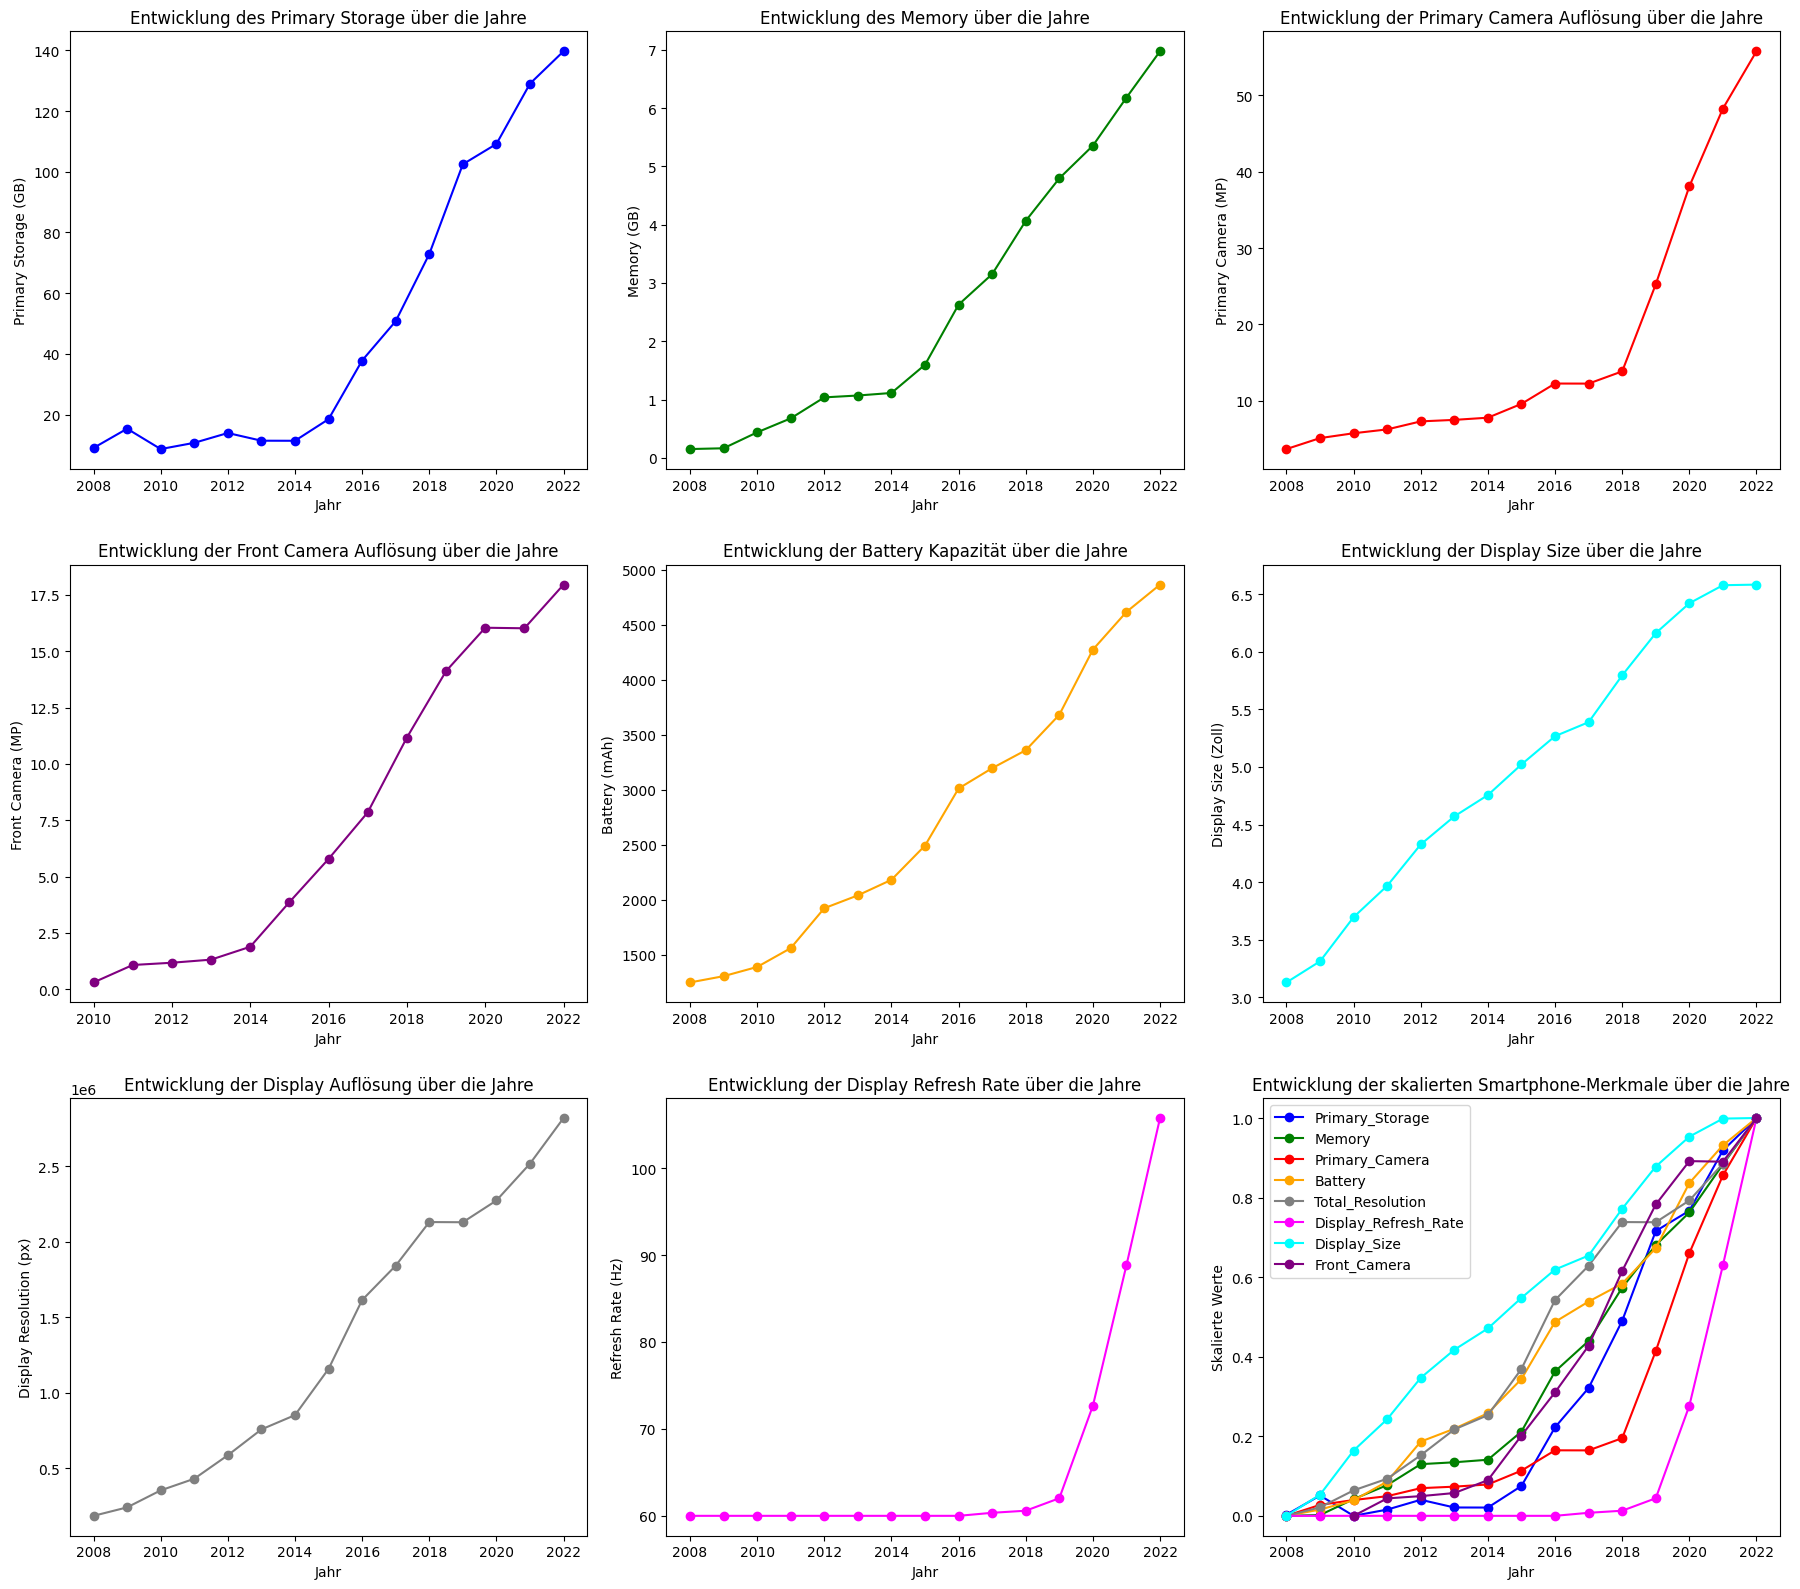

Kombinierte Tabelle der Original- und skalierten Werte über die Jahre:
                    Original                                        \
             Primary_Storage    Memory Primary_Camera      Battery   
Release_Date                                                         
2008                9.000000  0.150000       3.700000  1247.000000   
2009               15.333333  0.163333       5.133333  1303.933333   
2010                8.633333  0.436667       5.766667  1387.666667   
2011               10.685714  0.676429       6.271429  1558.714286   
2012               13.920000  1.036667       7.320000  1921.600000   
2013               11.384615  1.068681       7.516484  2038.538462   
2014               11.360544  1.112245       7.802721  2179.761905   
2015               18.474474  1.596096       9.612613  2490.780781   
2016               37.808511  2.627660      12.271277  3009.867021   
2017               50.767442  3.151163      12.261628  3194.348837   
2018               

In [73]:
# Gruppierung nach Jahr und Berechnung des Durchschnitts für die Merkmale
grouped_data = categorized_data.groupby('Release_Date')[['Primary_Storage', 'Memory', 'Primary_Camera', 'Battery',
                                                         'Total_Resolution', 'Display_Refresh_Rate', 
                                                         'Display_Size', 'Front_Camera']].mean()

# Skalierung der Daten auf den Bereich [0, 1] mit Min-Max Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(grouped_data)

# Erstellen eines neuen DataFrames mit den skalierten Daten
scaled_grouped_data = pd.DataFrame(scaled_data, columns=grouped_data.columns, index=grouped_data.index)

# Definieren der Farben, die in den individuellen Plots verwendet wurden
colors = {
    'Primary_Storage': 'blue',
    'Memory': 'green',
    'Primary_Camera': 'red',
    'Front_Camera': 'purple',
    'Battery': 'orange',
    'Display_Size': 'cyan',
    'Total_Resolution': 'grey',
    'Display_Refresh_Rate': 'magenta'
}

# Visualisierung der Entwicklung dieser Merkmale im Zeitverlauf
plt.figure(figsize=(18, 16))

# Plot für Primary Storage
plt.subplot(3, 3, 1)
plt.plot(grouped_data.index, grouped_data['Primary_Storage'], marker='o', color=colors['Primary_Storage'])
plt.title('Entwicklung des Primary Storage über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Primary Storage (GB)')

# Plot für Memory
plt.subplot(3, 3, 2)
plt.plot(grouped_data.index, grouped_data['Memory'], marker='o', color=colors['Memory'])
plt.title('Entwicklung des Memory über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Memory (GB)')

# Plot für Primary Camera
plt.subplot(3, 3, 3)
plt.plot(grouped_data.index, grouped_data['Primary_Camera'], marker='o', color=colors['Primary_Camera'])
plt.title('Entwicklung der Primary Camera Auflösung über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Primary Camera (MP)')

# Plot für Front Camera
plt.subplot(3, 3, 4)
plt.plot(grouped_data.index, grouped_data['Front_Camera'], marker='o', color=colors['Front_Camera'])
plt.title('Entwicklung der Front Camera Auflösung über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Front Camera (MP)')

# Plot für Battery
plt.subplot(3, 3, 5)
plt.plot(grouped_data.index, grouped_data['Battery'], marker='o', color=colors['Battery'])
plt.title('Entwicklung der Battery Kapazität über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Battery (mAh)')

# Plot für Display Size
plt.subplot(3, 3, 6)
plt.plot(grouped_data.index, grouped_data['Display_Size'], marker='o', color=colors['Display_Size'])
plt.title('Entwicklung der Display Size über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Display Size (Zoll)')

# Plot für Display Resolution
plt.subplot(3, 3, 7)
plt.plot(grouped_data.index, grouped_data['Total_Resolution'], marker='o', color=colors['Total_Resolution'])
plt.title('Entwicklung der Display Auflösung über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Display Resolution (px)')

# Plot für Display Refresh Rate
plt.subplot(3, 3, 8)
plt.plot(grouped_data.index, grouped_data['Display_Refresh_Rate'], marker='o', color=colors['Display_Refresh_Rate'])
plt.title('Entwicklung der Display Refresh Rate über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Refresh Rate (Hz)')

# Plot für alle skalierten Merkmale (mit den gleichen Farben wie die ursprünglichen Plots)
plt.subplot(3, 3, 9)
for column in scaled_grouped_data.columns:
    plt.plot(scaled_grouped_data.index, scaled_grouped_data[column], marker='o', label=column, color=colors[column])

# Hinzufügen von Beschriftungen und Legende für den letzten Plot
plt.title('Entwicklung der skalierten Smartphone-Merkmale über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Skalierte Werte')
plt.legend()

# Diagramm anpassen und anzeigen
plt.tight_layout()
plt.show()

# Kombinieren der Originaldaten und der skalierten Daten in einem gemeinsamen DataFrame
combined_data = pd.concat([grouped_data, scaled_grouped_data], axis=1, keys=['Original', 'Scaled'])

# Ausgabe der kombinierten Tabelle
print("Kombinierte Tabelle der Original- und skalierten Werte über die Jahre:")
print(combined_data)

# Optional: Speichern der kombinierten Tabelle in eine CSV-Datei, wenn erforderlich
combined_data.to_csv('combined_smartphone_features.csv')